In [1]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
)

RANDOM_STATE = 42

BASE_DIR = Path(".")
DATA_DIR = BASE_DIR / "data"
ARTIFACTS_DIR = BASE_DIR / "artifacts"
FIG_DIR = ARTIFACTS_DIR / "figures"
LABELS_DIR = ARTIFACTS_DIR / "labels"

In [2]:
def compute_internal_metrics(X, labels):
    # если вдруг алгоритм вернул 1 кластер — silhouette не считается
    uniq = np.unique(labels)
    if len(uniq) < 2:
        return {"silhouette": None, "davies_bouldin": None, "calinski_harabasz": None}

    return {
        "silhouette": float(silhouette_score(X, labels)),
        "davies_bouldin": float(davies_bouldin_score(X, labels)),
        "calinski_harabasz": float(calinski_harabasz_score(X, labels)),
    }


def pca_scatter(X_2d, labels, title, outpath):
    plt.figure(figsize=(7, 5))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=10)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(outpath, dpi=150)
    plt.show()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


sample_id    0.0
f01          0.0
f02          0.0
f03          0.0
f04          0.0
f05          0.0
f06          0.0
f07          0.0
f08          0.0
dtype: float64

,k,silhouette,davies_bouldin,calinski_harabasz
0,2,0.521825,0.686399,8869.415609
1,3,0.396176,0.963597,7810.668487
2,4,0.383553,1.156681,7067.937557
3,5,0.353653,1.277467,6214.199849
4,6,0.347647,1.151353,5606.913995
5,7,0.335038,1.185201,5108.681839
6,8,0.269100,1.313355,4852.618941
7,9,0.250794,1.350912,4664.554391
8,10,0.263265,1.281963,4560.398642
9,11,0.266234,1.208889,4422.467684


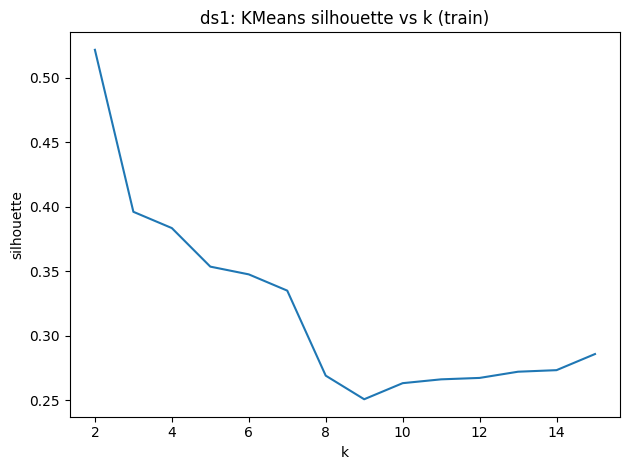

,k,linkage,silhouette,davies_bouldin,calinski_harabasz
0,2,ward,0.521825,0.686399,8869.415609
1,2,average,0.521825,0.686399,8869.415609


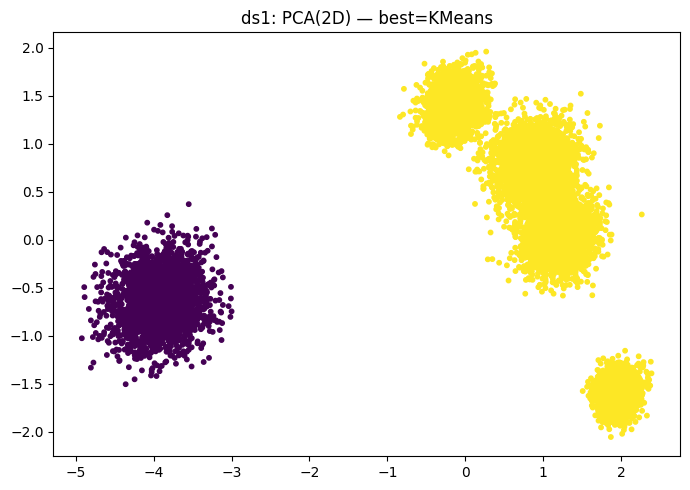

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


sample_id    0.0
x1           0.0
x2           0.0
z_noise      0.0
dtype: float64

,k,silhouette,davies_bouldin,calinski_harabasz
0,2,0.309388,1.313769,2714.957398
1,3,0.272282,1.228121,2326.315750
2,4,0.250899,1.302832,2199.693281
3,5,0.253041,1.222023,2043.749705
4,6,0.248315,1.218431,1920.154241
5,7,0.252071,1.191467,1872.958573
6,8,0.258702,1.117334,1833.766463
7,9,0.262764,1.080475,1819.868161
8,10,0.264044,1.051968,1823.090669
9,11,0.262855,1.017525,1792.604879


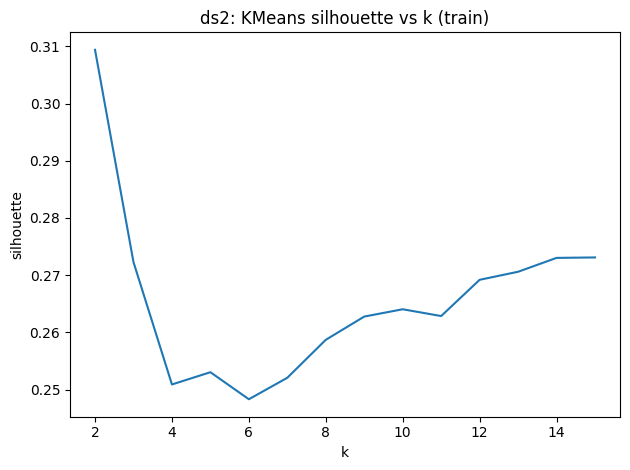

,k,linkage,silhouette,davies_bouldin,calinski_harabasz
0,2,ward,0.258392,1.493760,2116.815674
1,2,average,0.421866,0.935875,284.119022


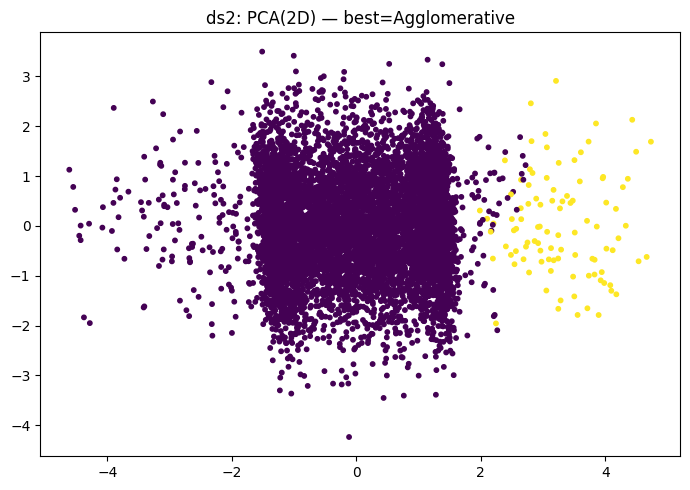

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


sample_id    0.0
x1           0.0
x2           0.0
f_corr       0.0
f_noise      0.0
dtype: float64

,k,silhouette,davies_bouldin,calinski_harabasz
0,2,0.298961,1.356217,5260.255562
1,3,0.315862,1.158560,5227.497329
2,4,0.315026,1.159126,4877.366198
3,5,0.299165,1.167460,4597.544921
4,6,0.292223,1.146104,4564.489807
5,7,0.280980,1.214632,4410.038960
6,8,0.291743,1.144178,4244.004300
7,9,0.287478,1.117076,4184.991260
8,10,0.281645,1.135072,4075.046309
9,11,0.273984,1.135601,3946.205991


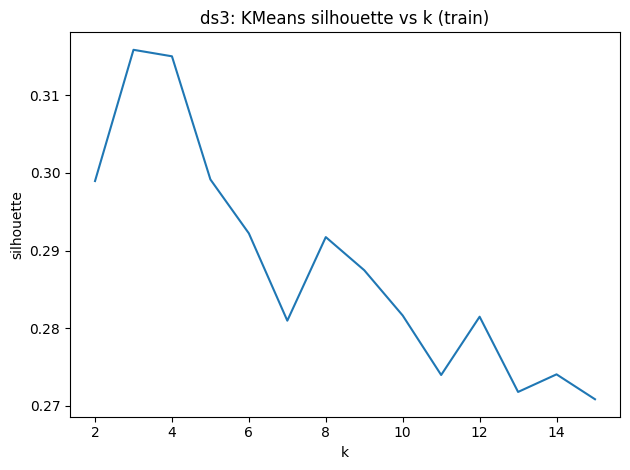

,k,linkage,silhouette,davies_bouldin,calinski_harabasz
0,3,ward,0.311794,1.163326,5000.790854
1,3,average,0.333342,0.541002,7.895515


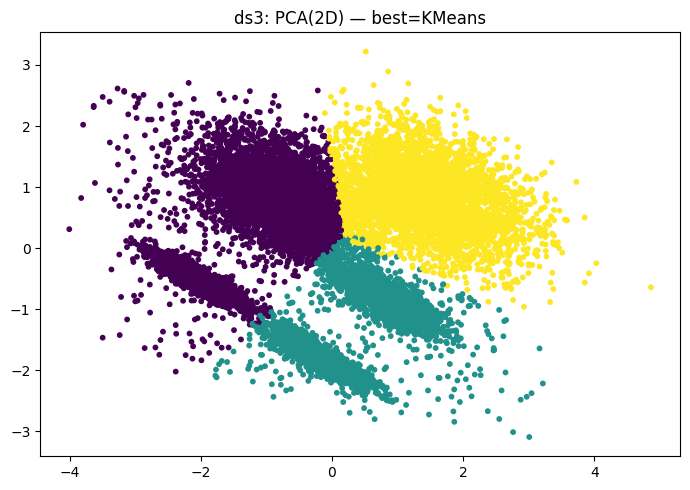

{'ds1': {'KMeans': {'params': {'k': 2},
   'test_metrics': {'silhouette': 0.5178583444837112,
    'davies_bouldin': 0.6869719437123576,
    'calinski_harabasz': 2872.1110566136354}},
  'Agglomerative': {'params': {'k': 2, 'linkage': 'ward'},
   'test_metrics': {'silhouette': 0.5178583444837112,
    'davies_bouldin': 0.6869719437123576,
    'calinski_harabasz': 2872.1110566136354}}},
 'ds2': {'KMeans': {'params': {'k': 2},
   'test_metrics': {'silhouette': 0.30793368847359226,
    'davies_bouldin': 1.3132762522404255,
    'calinski_harabasz': 909.8533731733464}},
  'Agglomerative': {'params': {'k': 2, 'linkage': 'average'},
   'test_metrics': {'silhouette': 0.4306711137258004,
    'davies_bouldin': 1.037179357716423,
    'calinski_harabasz': 103.89929566135106}}},
 'ds3': {'KMeans': {'params': {'k': 3},
   'test_metrics': {'silhouette': 0.31484304349330655,
    'davies_bouldin': 1.1546400103910535,
    'calinski_harabasz': 1732.3930619233174}},
  'Agglomerative': {'params': {'k': 3, 'li

In [3]:
datasets = [
    ("ds1", DATA_DIR / "S07-hw-dataset-01.csv"),
    ("ds2", DATA_DIR / "S07-hw-dataset-02.csv"),
    ("ds3", DATA_DIR / "S07-hw-dataset-03.csv"),
]

preprocess = Pipeline([
    ("scaler", StandardScaler())
])

metrics_summary = {}
best_configs = {}

for ds_code, path in datasets:
    df = pd.read_csv(path)

    display(df.head())
    df.info()
    display(df.describe())
    display(df.isna().mean().sort_values(ascending=False).head(10))

    sample_id = df["sample_id"].copy()
    X = df.drop(columns=["sample_id"])

    X_train, X_test, sid_train, sid_test = train_test_split(
        X, sample_id,
        test_size=0.25,
        random_state=RANDOM_STATE
    )

    X_train_t = preprocess.fit_transform(X_train)
    X_test_t = preprocess.transform(X_test)

    k_values = list(range(2, 16))  # лёгкий диапазон 2..15
    kmeans_rows = []

    for k in k_values:
        km = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
        km.fit(X_train_t)
        train_labels = km.labels_

        m = compute_internal_metrics(X_train_t, train_labels)
        kmeans_rows.append({"k": k, **m})

    kmeans_df = pd.DataFrame(kmeans_rows)
    display(kmeans_df)

    plt.figure()
    plt.plot(kmeans_df["k"], kmeans_df["silhouette"])
    plt.title(f"{ds_code}: KMeans silhouette vs k (train)")
    plt.xlabel("k")
    plt.ylabel("silhouette")
    plt.tight_layout()
    plt.savefig(FIG_DIR / f"{ds_code}_kmeans_silhouette_vs_k.png", dpi=150)
    plt.show()

    best_k = int(kmeans_df.sort_values("silhouette", ascending=False).iloc[0]["k"])
    best_kmeans = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init=10).fit(X_train_t)

    test_labels_km = best_kmeans.predict(X_test_t)
    km_test_metrics = compute_internal_metrics(X_test_t, test_labels_km)

    linkages = ["ward", "average"]
    agglo_rows = []

    for linkage in linkages:
        agg = AgglomerativeClustering(n_clusters=best_k, linkage=linkage)
        train_labels = agg.fit_predict(X_train_t)
        m = compute_internal_metrics(X_train_t, train_labels)
        agglo_rows.append({"k": best_k, "linkage": linkage, **m})

    agglo_df = pd.DataFrame(agglo_rows)
    display(agglo_df)

    best_linkage = agglo_df.sort_values("silhouette", ascending=False).iloc[0]["linkage"]
    best_agg = AgglomerativeClustering(n_clusters=best_k, linkage=best_linkage)
    test_labels_ag = best_agg.fit_predict(X_test_t)
    ag_test_metrics = compute_internal_metrics(X_test_t, test_labels_ag)

    metrics_summary[ds_code] = {
        "KMeans": {"params": {"k": best_k}, "test_metrics": km_test_metrics},
        "Agglomerative": {"params": {"k": best_k, "linkage": best_linkage}, "test_metrics": ag_test_metrics},
    }


    km_s = km_test_metrics["silhouette"] if km_test_metrics["silhouette"] is not None else -1
    ag_s = ag_test_metrics["silhouette"] if ag_test_metrics["silhouette"] is not None else -1

    if km_s >= ag_s:
        best_method = "KMeans"
        best_labels_test = test_labels_km
        best_params = {"k": best_k}
        best_model_for_plot = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init=10).fit(preprocess.fit_transform(X))
        labels_full = best_model_for_plot.labels_
        preprocess_full = preprocess  # уже fit выше в fit_transform
    else:
        best_method = "Agglomerative"
        best_labels_test = test_labels_ag
        best_params = {"k": best_k, "linkage": best_linkage}
        # Для финальных labels на всём датасете:
        X_full_t = preprocess.fit_transform(X)
        labels_full = AgglomerativeClustering(n_clusters=best_k, linkage=best_linkage).fit_predict(X_full_t)

    best_configs[ds_code] = {
        "best_method": best_method,
        "criterion": "silhouette on test (simple rule)",
        "best_params": best_params
    }

    X_full_t = preprocess.fit_transform(X)
    pca = PCA(n_components=2, random_state=RANDOM_STATE)
    X_pca = pca.fit_transform(X_full_t)

    pca_scatter(
        X_pca,
        labels_full,
        title=f"{ds_code}: PCA(2D) — best={best_method}",
        outpath=FIG_DIR / f"{ds_code}_pca_best.png"
    )

    out_labels = pd.DataFrame({"sample_id": sample_id, "cluster_label": labels_full})
    out_labels.to_csv(LABELS_DIR / f"labels_{ds_code}.csv", index=False)

metrics_summary

In [4]:
with open(ARTIFACTS_DIR / "metrics_summary.json", "w", encoding="utf-8") as f:
    json.dump(metrics_summary, f, ensure_ascii=False, indent=2)

with open(ARTIFACTS_DIR / "best_configs.json", "w", encoding="utf-8") as f:
    json.dump(best_configs, f, ensure_ascii=False, indent=2)

pd.DataFrame(best_configs).T

,best_method,criterion,best_params
ds1,KMeans,silhouette on test (simple rule),{'k': 2}
ds2,Agglomerative,silhouette on test (simple rule),"{'k': 2, 'linkage': 'average'}"
ds3,KMeans,silhouette on test (simple rule),{'k': 3}


In [5]:
ds_code = "ds1"
path = DATA_DIR / "S07-hw-dataset-01.csv"
df = pd.read_csv(path)

sample_id = df["sample_id"].copy()
X = df.drop(columns=["sample_id"])

X_t = preprocess.fit_transform(X)

# возьмём k из best_configs
k = best_configs[ds_code]["best_params"]["k"]

seeds = [1, 2, 3, 4, 5]
labels_runs = []

for seed in seeds:
    km = KMeans(n_clusters=k, random_state=seed, n_init=10).fit(X_t)
    labels_runs.append(km.labels_)

# средний ARI по всем парам запусков
aris = []
for i in range(len(labels_runs)):
    for j in range(i+1, len(labels_runs)):
        aris.append(adjusted_rand_score(labels_runs[i], labels_runs[j]))

pd.DataFrame({"pairwise_ARI": aris}).describe()

,pairwise_ARI
count,10.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0
